## Importing Libraries

In [1]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings  #to ignore warnings
warnings.filterwarnings("ignore")

## Importing the data

In [4]:
rawData = pd.read_csv('loan.csv',low_memory = False) #Reading input data from the CSV file.

In [5]:
rawData.head() #Verifying the data if read properly

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
rawData.shape #Shape of data

(39717, 111)

In [5]:
rawData.info(verbose=True,null_counts=True) # Checking the Data Type and Null Counts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

## Data Cleaning
#### Dropping columns with high missing values

In [7]:
# Removing unnecessary columns.
baseData = rawData.drop(['desc','emp_title','url','title','zip_code','addr_state','delinq_2yrs','earliest_cr_line','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_credit_pull_d','pub_rec_bankruptcies','mths_since_last_delinq', 'mths_since_last_record','next_pymnt_d','mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','tot_coll_amt','mo_sin_old_il_acct'], axis=1)

In [8]:
baseData.info() #getting information on the refined columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

In [9]:
#identifying columns with single unique values.
for col in baseData:
    print('{:<30}  {:>12}'.format(col, baseData[col].nunique()))
    

id                                     39717
member_id                              39717
loan_amnt                                885
funded_amnt                             1041
funded_amnt_inv                         8205
term                                       2
int_rate                                 371
installment                            15383
grade                                      7
sub_grade                                 35
emp_length                                11
home_ownership                             5
annual_inc                              5318
verification_status                        3
issue_d                                   55
loan_status                                3
pymnt_plan                                 1
purpose                                   14
dti                                     2868
inq_last_6mths                             9
open_acc                                  40
initial_list_status                        1
last_pymnt

In [10]:
# Dropping columns with single unique values
baseData=baseData.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1) 

In [11]:
#Veryfying the columns
for col in baseData:
    print('{:<30}  {:>12}'.format(col, baseData[col].nunique()))

id                                     39717
member_id                              39717
loan_amnt                                885
funded_amnt                             1041
funded_amnt_inv                         8205
term                                       2
int_rate                                 371
installment                            15383
grade                                      7
sub_grade                                 35
emp_length                                11
home_ownership                             5
annual_inc                              5318
verification_status                        3
issue_d                                   55
loan_status                                3
purpose                                   14
dti                                     2868
inq_last_6mths                             9
open_acc                                  40
last_pymnt_d                             101
last_pymnt_amnt                        34930


## Initial Data analysis

In [12]:
baseData.dtypes #Checking the types of the Columns

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
inq_last_6mths           int64
open_acc                 int64
last_pymnt_d            object
last_pymnt_amnt        float64
dtype: object

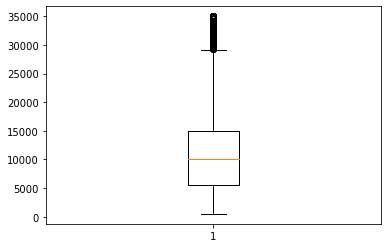

In [25]:
#checking outliers in loan amount
plt.boxplot(baseData.loan_amnt)
plt.show()

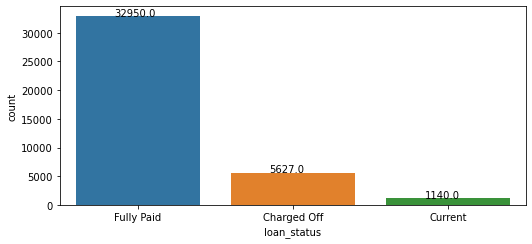

In [35]:
ax=sns.countplot(x="loan_status",data=baseData)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

# Observation
#Out of 39717, 5627 loans have been charged off. They are defaulters.
#Comparatively the number of loans that have been charged off is far lesser than the Fully Paid.

In [13]:
# People who received less approved funded amount
(baseData[baseData['loan_amnt'] != baseData['funded_amnt']])

# Able to observe that the propotion is comparitively less.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,open_acc,last_pymnt_d,last_pymnt_amnt
61,1068934,1277395,17500,8950,8925.000000,60 months,17.27%,223.74,D,D3,...,40000.0,Verified,Dec-11,Fully Paid,small_business,19.47,1,5,Feb-16,2487.58
66,1069093,1303740,12500,8925,8925.000000,60 months,17.27%,223.11,D,D3,...,30000.0,Source Verified,Dec-11,Charged Off,debt_consolidation,13.16,0,7,Feb-14,223.11
70,1069043,1303486,20975,13575,13550.000000,60 months,17.58%,341.63,D,D4,...,44000.0,Verified,Dec-11,Fully Paid,credit_card,18.79,0,13,Apr-14,9245.21
77,1068416,1302799,7250,7200,7175.000000,60 months,21.67%,197.51,F,F3,...,75000.0,Verified,Dec-11,Fully Paid,debt_consolidation,24.82,2,9,Sep-12,6824.70
80,1068994,1303432,35000,22075,22050.000000,60 months,17.27%,551.84,D,D3,...,150000.0,Verified,Dec-11,Fully Paid,home_improvement,7.51,1,11,Feb-14,15660.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39533,167645,163382,10000,6000,700.000000,36 months,8.70%,189.97,B,B1,...,24000.0,Not Verified,Dec-07,Fully Paid,debt_consolidation,19.45,2,3,Apr-10,3.94
39593,141774,141767,20000,4800,1949.999594,36 months,13.12%,162.01,D,D5,...,85000.0,Not Verified,Oct-07,Charged Off,debt_consolidation,16.87,0,15,Aug-08,162.01
39600,140036,140027,4000,1000,550.000000,36 months,9.96%,32.25,B,B5,...,35000.0,Not Verified,Oct-07,Charged Off,other,5.83,2,7,Jan-10,32.25
39601,139980,139977,12000,5000,1399.996684,36 months,10.91%,163.49,C,C3,...,39000.0,Not Verified,Oct-07,Charged Off,other,11.78,0,6,Mar-10,163.49


In [28]:
baseData.loan_status.unique() #Identifying the Unique Values for Loan Status Column

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

| loan_status: |  |
| --- | ----------- |
| Fully Paid | Non Defaulters |
| Charged off | Defaulters |
| Current | Cannot Say anything |

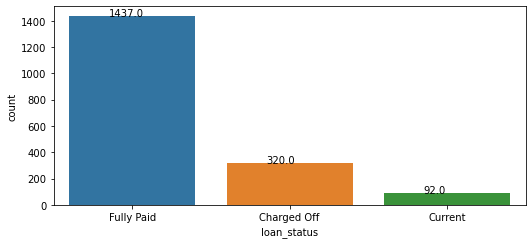

In [33]:
ax=sns.countplot(x="loan_status",data=baseData[baseData['loan_amnt']!=baseData['funded_amnt']])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

#               OBSERVATIONS 
#1849 people received less approved funded amount.
#After checking loan status.
#Out of 1849, 320 are charged off. These are defaulter.
#Out of 1849, 92 are current.

In [16]:
# People who received different approved funded amount from invester
#df1['funded_amnt_inv']=df1['funded_amnt_inv'].astype(int)

In [15]:
baseData['funded_amnt_inv'] #Checking the funded_amnt_inv column

0         4975.0
1         2500.0
2         2400.0
3        10000.0
4         3000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 39717, dtype: float64

In [16]:
# People who received more approved funded amount from invester
baseData[baseData['funded_amnt']<baseData['funded_amnt_inv']]

# OBSERVATION 
# No Borrower has recieved more than the recommended amount.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,open_acc,last_pymnt_d,last_pymnt_amnt


In [17]:
baseData[baseData['funded_amnt']>baseData['funded_amnt_inv']]
#19842 people received less approved funded amount from investors.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,open_acc,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,1,3,Jan-15,171.62
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,15000.0,Verified,Dec-11,Charged Off,other,18.08,0,2,Nov-12,121.45
20,1069740,1284848,20250,20250,19142.16108,60 months,15.27%,484.63,C,C4,...,43370.0,Verified,Dec-11,Fully Paid,debt_consolidation,26.53,3,8,Aug-15,6024.09
26,1069800,1304679,15000,15000,8725.00000,36 months,14.27%,514.64,C,C2,...,60000.0,Not Verified,Dec-11,Charged Off,debt_consolidation,15.22,1,7,NaN,0.00
32,1065420,1299514,10000,10000,9975.00000,60 months,15.96%,242.97,C,C5,...,29120.0,Verified,Dec-11,Current,debt_consolidation,22.83,1,11,May-16,242.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.00000,36 months,8.07%,78.42,A,A4,...,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,11.33,0,13,Jul-10,80.90
39713,90665,90607,8500,8500,875.00000,36 months,10.28%,275.38,C,C1,...,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,6.40,1,6,Jul-10,281.94
39714,90395,90390,5000,5000,1325.00000,36 months,8.07%,156.84,A,A4,...,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,2.30,0,11,Apr-08,0.00
39715,90376,89243,5000,5000,650.00000,36 months,7.43%,155.38,A,A2,...,200000.0,Not Verified,Jul-07,Fully Paid,other,3.72,0,17,Jan-08,0.00


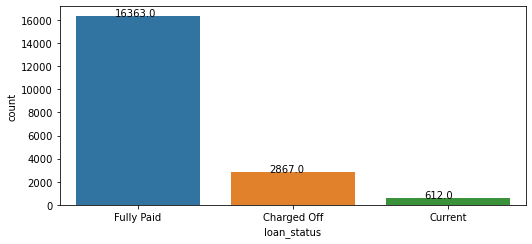

In [34]:
ax=sns.countplot(x="loan_status",data=baseData[baseData['funded_amnt']!=baseData['funded_amnt_inv']])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

#After checking loan status.
#Out of 19842, 2867 are charged off. These are defaulter.
#Out of 19842, 612 are current.

In [19]:
#Converting int_rate from object dtypes to float and removing the % symbol.
baseData['int_rate'] = baseData['int_rate'].apply(lambda x: float(x.replace('%','')))
baseData['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [20]:
baseData.open_acc.unique()                   

array([ 3,  2, 10, 15,  9,  7,  4, 11, 14, 12, 20,  8,  6, 17,  5, 13, 16,
       30, 21, 18, 19, 27, 23, 34, 25, 22, 24, 26, 32, 28, 29, 33, 31, 39,
       35, 36, 38, 44, 41, 42], dtype=int64)

In [21]:
baseData.emp_length.value_counts() # Checking the employee length

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [22]:
baseData.annual_inc.describe() # Checking the annual Income

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [23]:
baseData.annual_inc = baseData.annual_inc.apply(lambda x : int(x)) # Correcting the data type of Annual Income

In [24]:
baseData.annual_inc.describe().apply(lambda x: format(x, 'f'))

count      39717.000000
mean       68968.919808
std        63793.766445
min         4000.000000
25%        40404.000000
50%        59000.000000
75%        82300.000000
max      6000000.000000
Name: annual_inc, dtype: object

In [25]:
#Deriving a new column from the existing column
baseData['monthly_income'] = baseData['annual_inc']/12
baseData['monthly_income']

0         2000.000000
1         2500.000000
2         1021.000000
3         4100.000000
4         6666.666667
             ...     
39712     9166.666667
39713     1500.000000
39714     8333.333333
39715    16666.666667
39716     1833.333333
Name: monthly_income, Length: 39717, dtype: float64

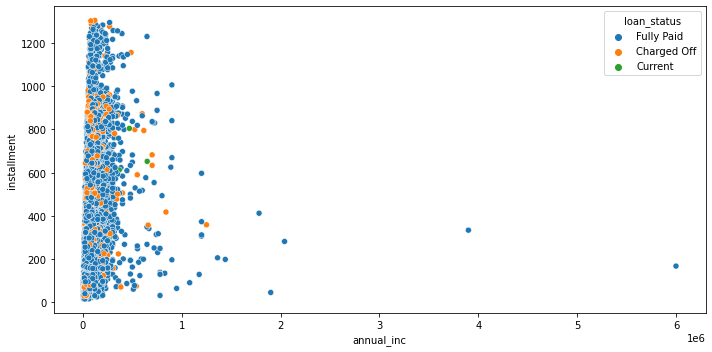

In [30]:
plt.figure(figsize=[10, 5])
sns.scatterplot(x='annual_inc',y='installment', data=baseData, hue='loan_status')
plt.show()

#Cannot make any insight with respect to installment as every body lies in low installment amount.
#There are some outliers in annual inc but are fully paid loan status.

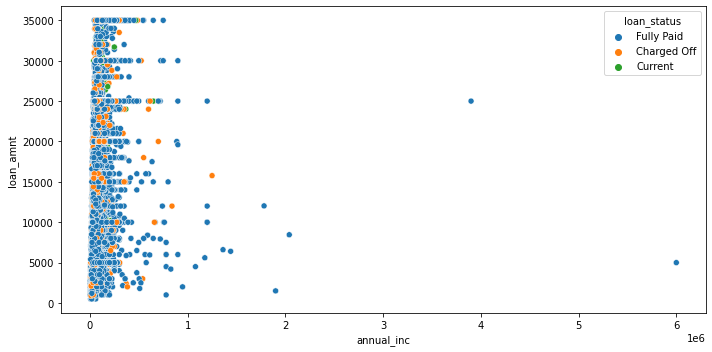

In [31]:
plt.figure(figsize=[10, 5])
sns.scatterplot(x='annual_inc',y='loan_amnt', data=baseData, hue='loan_status')
plt.show()



# Observations
#Cannot make any insight with respect to annual inc as almost everybody lies in low annual income.
#There are some outliers in annual inc with fully paid loan status

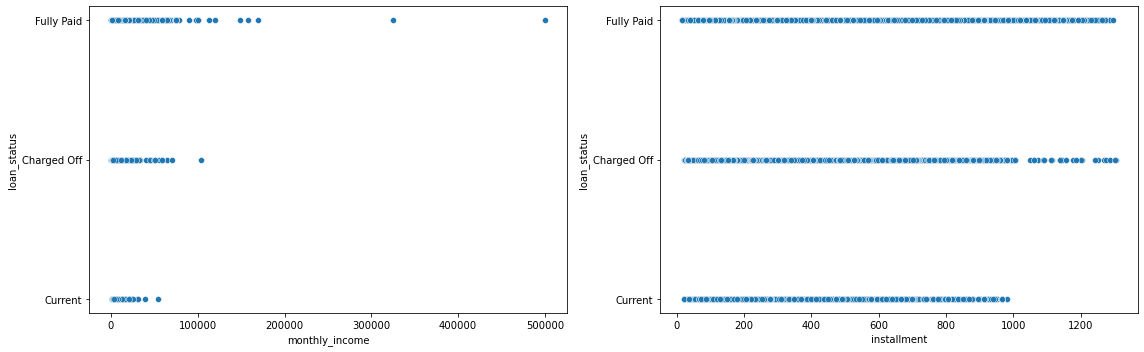

In [32]:
plt.figure(figsize = (16, 5))
ax0 = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,2)
sns.scatterplot(x="monthly_income", y="loan_status", data=baseData, ax= ax0);
sns.scatterplot(x="installment", y="loan_status", data=baseData, ax= ax1);
plt.show()

In [28]:
#data set with loan status as charged off
defaultersSet = baseData[baseData['loan_status'] == 'Charged Off']

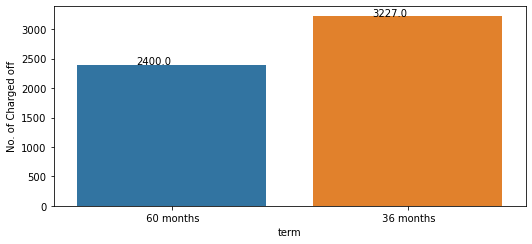

In [37]:
ax=sns.countplot(x="term",data=defaultersSet)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set(ylabel='No. of Charged off')
plt.show()


#  Observations
#  Comparitively loans with 36 months are among the majority of the defaulters.

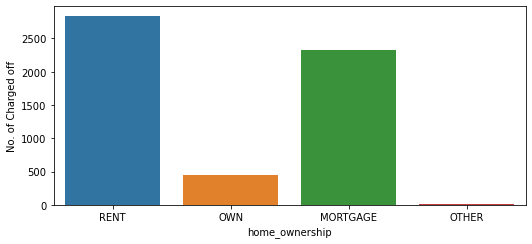

In [38]:
#checking defaulters with respect to home ownership.
ax=sns.countplot(x="home_ownership",data=defaultersSet)
ax.set(ylabel='No. of Charged off')
plt.show()

# Observations 
# People who lives on Rent or whose home are mortgaged are among the majority of the defaulters.

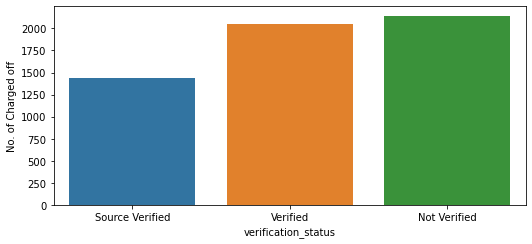

In [39]:
#checking defaulters with respect to verification status.
ax=sns.countplot(x="verification_status",data=defaultersSet)
ax.set(ylabel='No. of Charged off')
plt.show()


# Observations 
# Source verified are like lessly to make a default

In [40]:
#Removing data with null emp_length
defaultersSet = defaultersSet[(defaultersSet['loan_status'] == 'Charged Off') & (~defaultersSet['emp_length'].isna())]

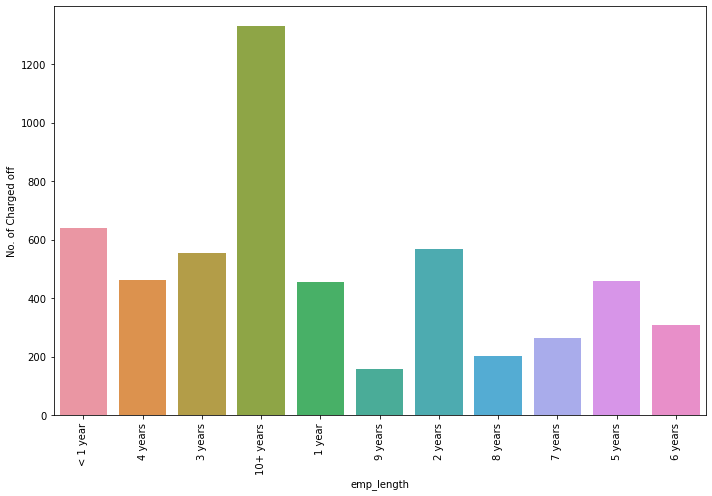

In [41]:
#checking defaulters with respect to emp_length
plt.figure(figsize=[10, 7])
ax =sns.countplot(x="emp_length",data=defaultersSet)
plt.xticks(rotation=90)
ax.set(ylabel='No. of Charged off')
plt.show()


#Observation 
#People who have 10+ years emp_length are among the majority of the defaulters.

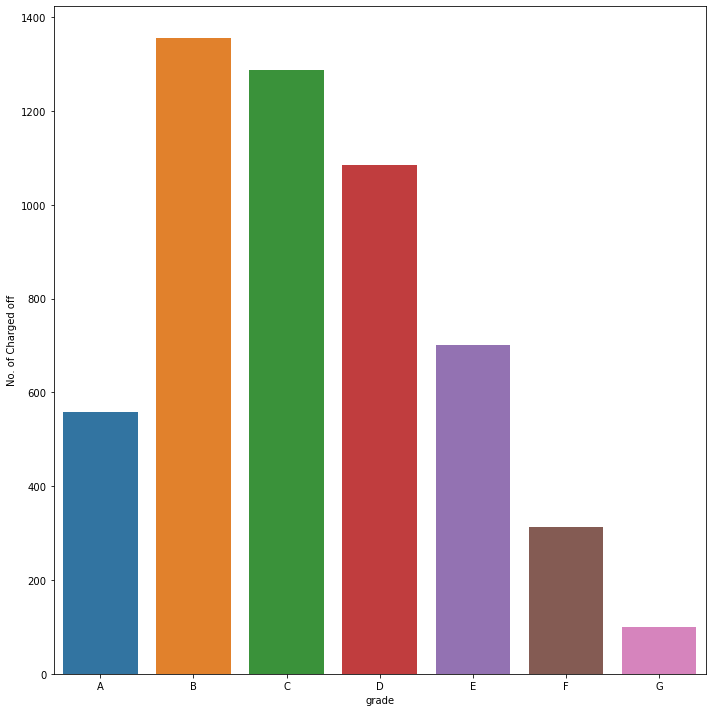

In [42]:
#checking defaulters with respect to grade
plt.figure(figsize=[10, 10])
ax=sns.countplot(x="grade",data=defaultersSet.sort_values('grade'))
ax.set(ylabel='No. of Charged off')
plt.show()

#Observations 
#Loans of grade B, C and D are among the majority of the defaulters.

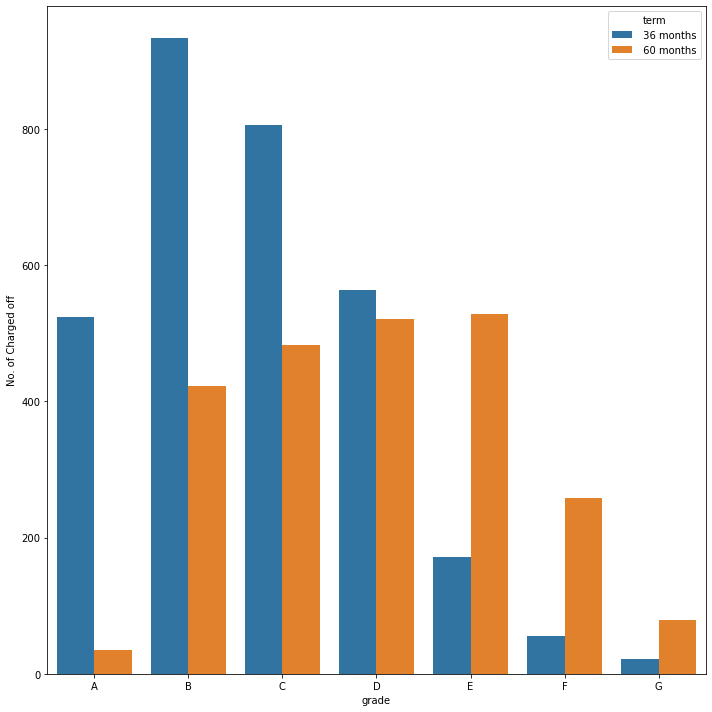

In [43]:
#checking defaulters with respect to grade
plt.figure(figsize=[10, 10])
ax=sns.countplot(x="grade",data=defaultersSet.sort_values('grade'),hue = 'term')
ax.set(ylabel='No. of Charged off')
plt.show()

#Observations 
#It is observed that the A, B , C and D grade have defaulted mostly on a 36 month duration.

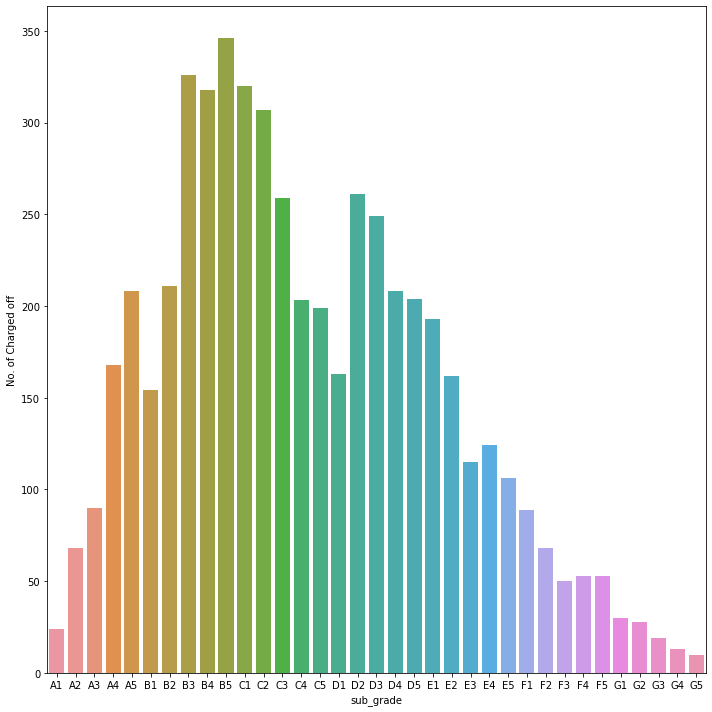

In [44]:
#checking defaulters with respect to sub-grade.
plt.figure(figsize=[10, 10])
ax=sns.countplot(x="sub_grade",data=defaultersSet.sort_values('sub_grade'))
ax.set(ylabel='No. of Charged off')
plt.show()


#Observations 
# Loans with Sub-Grade B3,B4,B5,C1,C2,C3,D2 and D3 are among the majority of the defaulters.

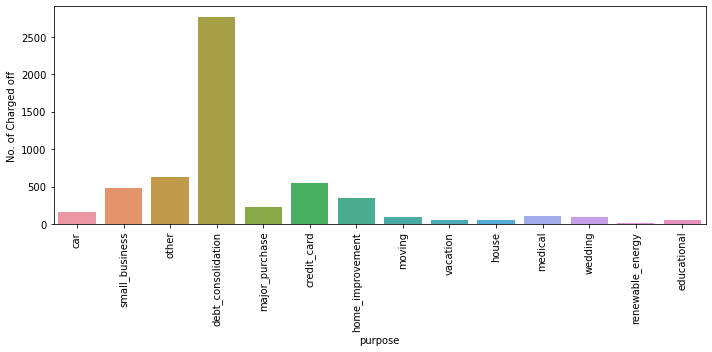

In [47]:
#checking defaulters with respect to purpose.
plt.figure(figsize=[10, 5])
ax=sns.countplot(x="purpose",data=defaultersSet)
plt.xticks(rotation=90)
ax.set(ylabel='No. of Charged off')
plt.show()

#Observations
# Loans taken for paying Off debts are among the majority of the defaulters.

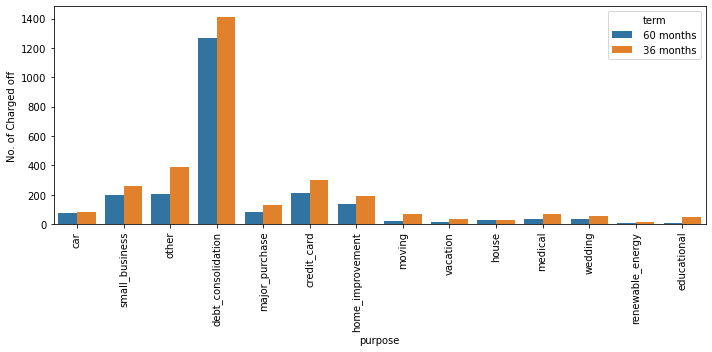

In [45]:
plt.figure(figsize=[10, 5])
ax=sns.countplot(x="purpose",data=defaultersSet,hue = 'term')
plt.xticks(rotation=90)
ax.set(ylabel='No. of Charged off')
plt.show()

#Observations
# There is no conclusive evidence , no relation between term and purpose.

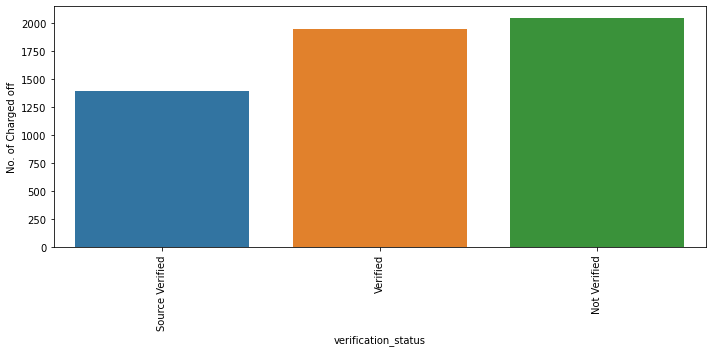

In [46]:
plt.figure(figsize=[10, 5])
ax=sns.countplot(x="verification_status",data=defaultersSet)
plt.xticks(rotation=90)
ax.set(ylabel='No. of Charged off')
plt.show()

# Observations
# If source verified the loan is less likely to be charged off.

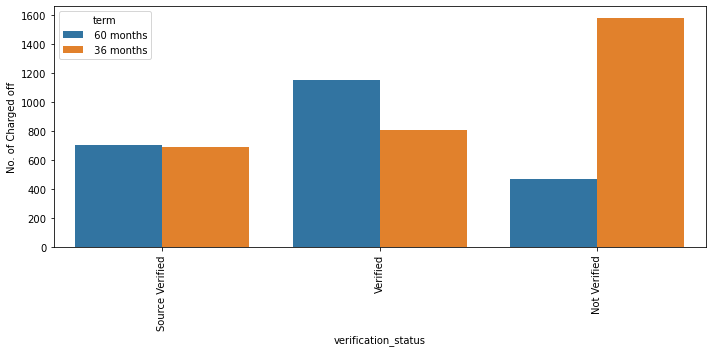

In [47]:
plt.figure(figsize=[10, 5])
ax=sns.countplot(x="verification_status",data=defaultersSet,hue = 'term')
plt.xticks(rotation=90)
ax.set(ylabel='No. of Charged off')
plt.show()

#Observations 
# Source verified ihas likely less effect on term

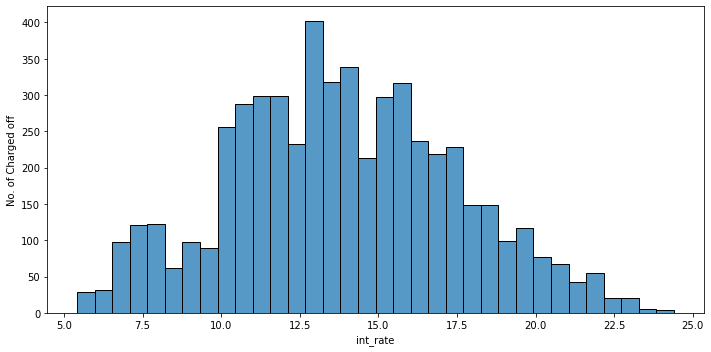

In [48]:
#checking defaulters with respect to interest rate.
plt.figure(figsize=[10, 5])
ax=sns.histplot(defaultersSet.int_rate)
ax.set(ylabel='No. of Charged off')
plt.show()

# Observations 
# Cannot make any insight with respect to interest rate.

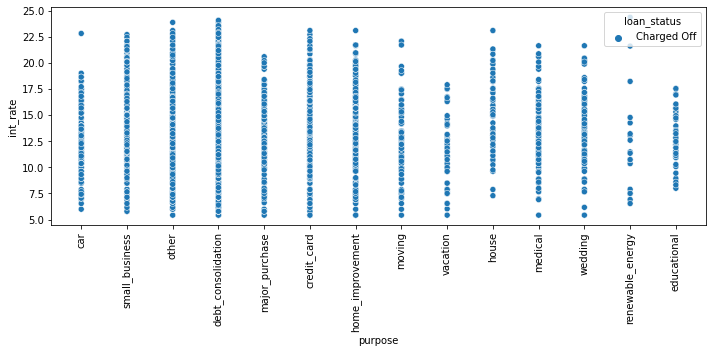

In [49]:
#checking if there is any relation between int_rate and purpose of loan with respect to defaulters.
plt.figure(figsize=[10,5])
ax=sns.scatterplot(data=defaultersSet, x='purpose', y='int_rate', hue="loan_status")
plt.xticks(rotation=90)
plt.show()

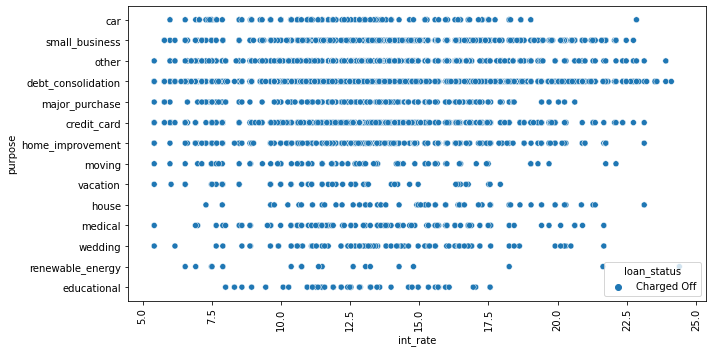

In [50]:
#checking if there is any relation between int_rate and purpose of loan with respect to defaulters.
plt.figure(figsize=[10,5])
ax=sns.scatterplot(data=defaultersSet, x='int_rate', y='purpose', hue="loan_status")
plt.xticks(rotation=90)
plt.show()

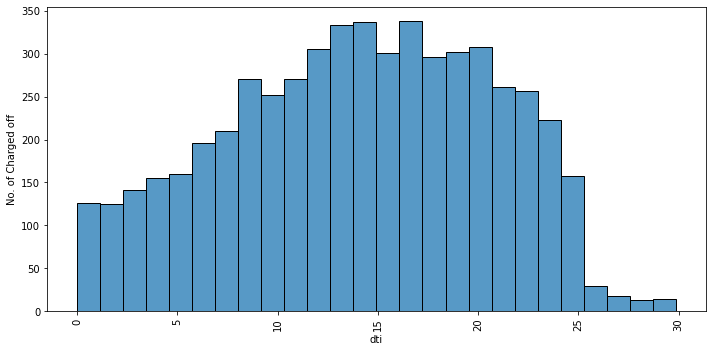

In [73]:
#checking defaulters with respect to dti.
plt.figure(figsize=[10,5])
ax=sns.histplot(defaultersSet.dti)
plt.xticks(rotation=90)
ax.set(ylabel='No. of Charged off')
plt.show()

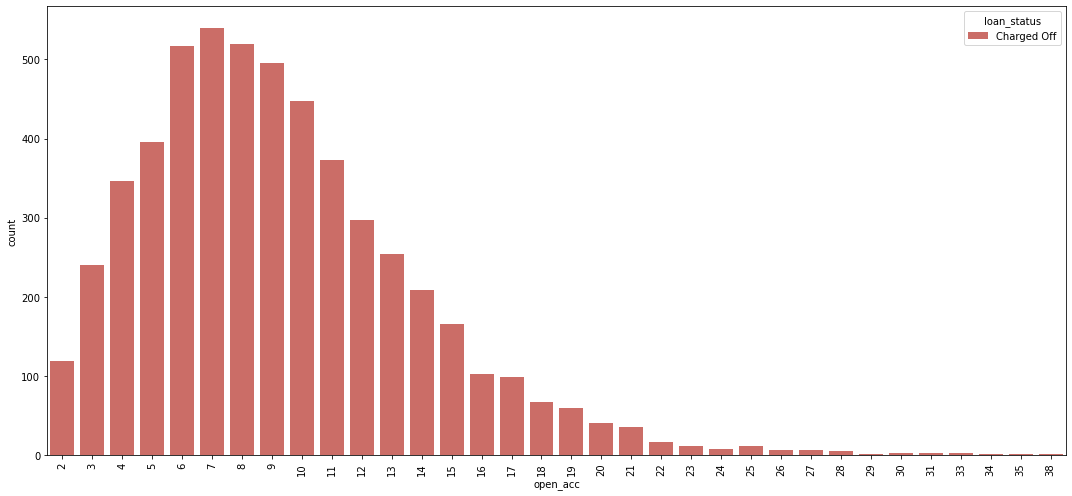

In [51]:
#checking loan status with respect to open acc.
plt.figure(figsize=[15, 7])
ax= sns.countplot(data=defaultersSet, x='open_acc',palette="hls", hue="loan_status")
plt.xticks(rotation=90)
plt.show()

# Cannot make any insight with respect to open acc.

In [52]:
defaultersSet.columns = defaultersSet.columns.str.replace(' ', '')

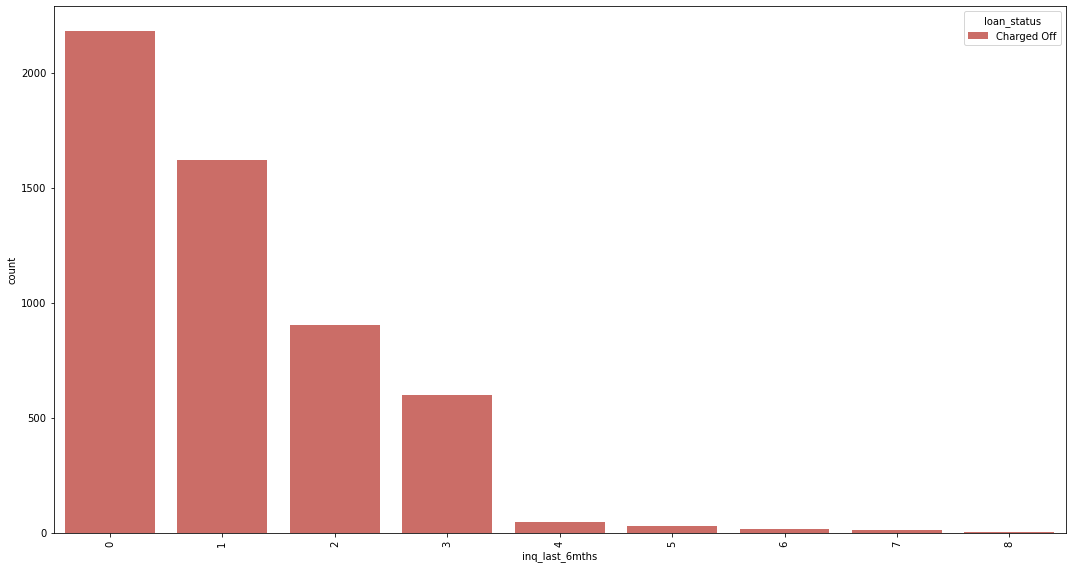

In [75]:
#checking loan status with respect to inq_last_6mths.
plt.figure(figsize=[15, 8])
ax= sns.countplot(data=defaultersSet, x='inq_last_6mths',palette="hls", hue="loan_status")
plt.xticks(rotation=90)
plt.show()

#Cannot make any insight with respect to inq_last_6mths¶

In [77]:
defaultersSet['issue_m'] = defaultersSet['issue_d'].apply(lambda x: x.split('-')[0])
defaultersSet.issue_m

1        Dec
8        Dec
9        Dec
12       Dec
14       Dec
        ... 
39667    Aug
39668    Aug
39669    Aug
39678    Aug
39688    Aug
Name: issue_m, Length: 5399, dtype: object

In [78]:
#Filling out missing columns
defaultersSet['issue_y'] = defaultersSet['issue_d'].apply(lambda x: x.split('-')[1])
defaultersSet.issue_y

1        11
8        11
9        11
12       11
14       11
         ..
39667    07
39668    07
39669    07
39678    07
39688    07
Name: issue_y, Length: 5399, dtype: object

In [79]:
#Filling out missing columns
defaultersSet['last_pymnt_m'] = defaultersSet['last_pymnt_d'].apply(lambda x: 'missing' if pd.isna(x) else x.split('-')[0])
defaultersSet.last_pymnt_m

1        Apr
8        Apr
9        Nov
12       Jul
14       Oct
        ... 
39667    Mar
39668    Mar
39669    Feb
39678    May
39688    Feb
Name: last_pymnt_m, Length: 5399, dtype: object

In [80]:
defaultersSet.last_pymnt_m.unique()

array(['Apr', 'Nov', 'Jul', 'Oct', 'Sep', 'missing', 'Dec', 'Aug', 'Feb',
       'Jun', 'Jan', 'Mar', 'May'], dtype=object)

In [81]:
defaultersSet['last_pymnt_y'] = defaultersSet['last_pymnt_d'].apply(lambda x: 'missing' if pd.isna(x) else x.split('-')[1])
defaultersSet.last_pymnt_y

1        13
8        12
9        12
12       12
14       13
         ..
39667    10
39668    10
39669    09
39678    09
39688    10
Name: last_pymnt_y, Length: 5399, dtype: object

In [82]:
defaultersSet.last_pymnt_y.unique()

array(['13', '12', 'missing', '14', '15', '16', '11', '10', '09', '08'],
      dtype=object)

In [83]:
defaultersSet.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,last_pymnt_amnt,monthly_income
id,1.000000,0.994180,0.161520,0.174968,0.322121,0.206881,0.088247,-0.008005,0.108630,-0.061286,0.024063,0.027454,-0.008005
member_id,0.994180,1.000000,0.156682,0.169727,0.330744,0.208249,0.077095,-0.009108,0.108639,-0.064516,0.018074,0.023484,-0.009108
loan_amnt,0.161520,0.156682,1.000000,0.978541,0.904253,0.344500,0.924393,0.347746,0.065087,0.009609,0.178495,0.329657,0.347746
funded_amnt,0.174968,0.169727,0.978541,1.000000,0.924604,0.347489,0.953196,0.342506,0.061853,0.009735,0.175552,0.335482,0.342506
funded_amnt_inv,0.322121,0.330744,0.904253,0.924604,1.000000,0.365753,0.854163,0.309644,0.074643,-0.017438,0.148644,0.287289,0.309644
int_rate,0.206881,0.208249,0.344500,0.347489,0.365753,1.000000,0.320223,0.126876,0.044896,0.057407,0.035207,0.091760,0.126876
installment,0.088247,0.077095,0.924393,0.953196,0.854163,0.320223,1.000000,0.353625,0.041728,0.020122,0.173061,0.347830,0.353625
annual_inc,-0.008005,-0.009108,0.347746,0.342506,0.309644,0.126876,0.353625,1.000000,-0.089257,0.040136,0.209191,0.128465,1.000000
dti,0.108630,0.108639,0.065087,0.061853,0.074643,0.044896,0.041728,-0.089257,1.000000,-0.028383,0.303604,-0.000546,-0.089257
inq_last_6mths,-0.061286,-0.064516,0.009609,0.009735,-0.017438,0.057407,0.020122,0.040136,-0.028383,1.000000,0.081577,0.011472,0.040136


In [84]:
defaultersSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5399 entries, 1 to 39688
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5399 non-null   int64  
 1   member_id            5399 non-null   int64  
 2   loan_amnt            5399 non-null   int64  
 3   funded_amnt          5399 non-null   int64  
 4   funded_amnt_inv      5399 non-null   float64
 5   term                 5399 non-null   object 
 6   int_rate             5399 non-null   float64
 7   installment          5399 non-null   float64
 8   grade                5399 non-null   object 
 9   sub_grade            5399 non-null   object 
 10  emp_length           5399 non-null   object 
 11  home_ownership       5399 non-null   object 
 12  annual_inc           5399 non-null   int64  
 13  verification_status  5399 non-null   object 
 14  issue_d              5399 non-null   object 
 15  loan_status          5399 non-null   

In [ ]:
 ##Bi Variate Analysis

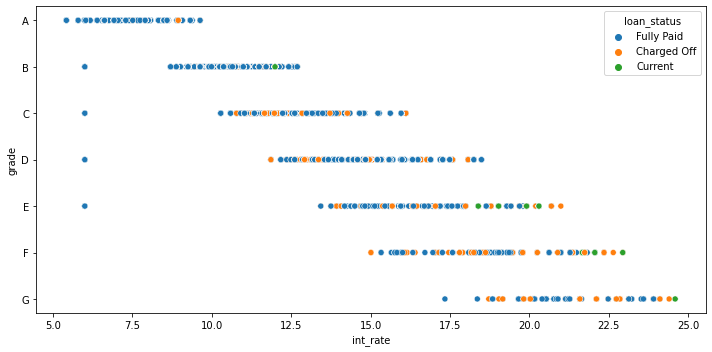

In [87]:
plt.figure(figsize=[10, 5])
sns.scatterplot(x='int_rate',y='grade', data=baseData.sort_values('grade'), hue='loan_status')
plt.show()

#this is to understand the domain, interst rate increases as grade increases.

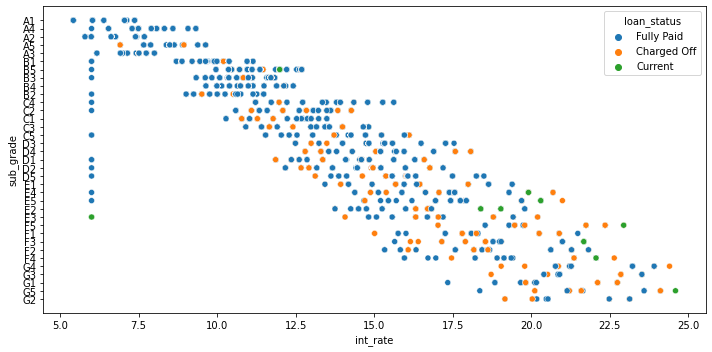

In [89]:

plt.figure(figsize=[10, 5])
sns.scatterplot(x='int_rate',y='sub_grade', data=baseData.sort_values('grade'), hue='loan_status')
plt.show()
#this is to understand the domain, interst rate increases as Subgrade increases.

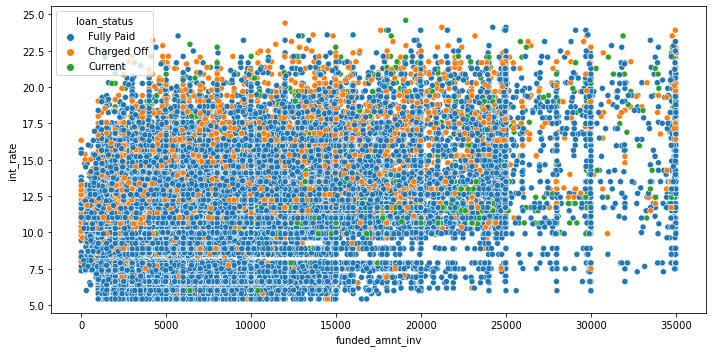

In [90]:
plt.figure(figsize=[10, 5])
sns.scatterplot(x='funded_amnt_inv',y='int_rate', data=baseData.sort_values('grade'), hue='loan_status')
plt.show()

#No insight is available from this analysis

In [91]:
baseData.corr()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,last_pymnt_amnt,monthly_income
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.078831,0.086587,0.008731,0.095983,-0.042378,0.020388,0.122365,0.008731
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.074725,0.081025,0.009380,0.096963,-0.047086,0.017928,0.123627,0.009380
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.309415,0.930288,0.271149,0.066439,0.009229,0.177168,0.448742,0.271149
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.312619,0.956159,0.266965,0.066283,0.009259,0.175530,0.453133,0.266965
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.306657,0.905039,0.254375,0.074689,-0.005712,0.163027,0.442604,0.254375
int_rate,0.078831,0.074725,0.309415,0.312619,0.306657,1.000000,0.282703,0.053185,0.111162,0.133013,0.010395,0.157775,0.053185
installment,0.086587,0.081025,0.930288,0.956159,0.905039,0.282703,1.000000,0.270874,0.054186,0.009722,0.172812,0.401688,0.270874
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.053185,0.270874,1.000000,-0.122732,0.033908,0.158200,0.140401,1.000000
dti,0.095983,0.096963,0.066439,0.066283,0.074689,0.111162,0.054186,-0.122732,1.000000,0.001405,0.288045,0.005212,-0.122732
inq_last_6mths,-0.042378,-0.047086,0.009229,0.009259,-0.005712,0.133013,0.009722,0.033908,0.001405,1.000000,0.091713,0.028514,0.033908
